# Сборный проект №1

# Описание данных.

В этом проекте будет проведена работа над данными интернет-магазина 'Стримчик' за 2016 год, которые находятся в открытом доступе. Наша задача - выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Комментарий ревьюера
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Промежуточный вывод:** На данном этапе мало, что можно сказать о данных, однако стоит отметить, что придется поработать с типами данных и пропусками, а также с названиями столбцов.

# Подготовка данных.

In [5]:
data = data.rename(columns=lambda x: x.lower())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Обработаем пропуски и типы данных.**

In [6]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
data = data.dropna(subset = ['name', 'genre'])

In [8]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y').dt.year

In [9]:
#data['critic_score'] = data.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))
data['critic_score'].fillna(-1, inplace=True)

In [10]:
#mode_value = data['rating'].mode().iloc[0]
#data['rating'].fillna(mode_value, inplace=True)
data['rating'].fillna(-1, inplace=True)

In [11]:
print(data.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating                0
dtype: int64


**Разберемся со значением 'tbd' в столбце 'user_score'**

In [12]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**'tbd' - это 'To be Determined', что в переводе означает: 'Будет определено'. Значит мы можем заменить все данные значения на значение 'nan'.**

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [14]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [15]:
data['user_score'] = data['user_score'].astype(float)

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [16]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,-1,31.38


**Проверим таблицу на дубликаты**

In [17]:
print(data.duplicated().sum())

0


In [18]:
data.sort_values(by=['name', 'platform', 'year_of_release'], inplace=True)
implicit_duplicates = data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
implicit_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [19]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

**Промежуточный вывод:**<br>Для дальнейшего удобства мы привели названия столбцов к нижнему регистру.<br>Поработали с типами данных, а именно: произвели замену столбца 'year_of_release', и теперь там указан лишь год.<br>Затем мы провели работу с пропусками, а конкретнее удалили пропуски в столбцах 'name'и 'genre', ведь это столбец с категориальными данными, в котором было мало пропусков. Пропуски в столбце 'year_of_release' мы решили не заполнять, поэтому просто избавились от данных строк. Пропуски в столбце 'critic_score' и 'rating' мы заполнили 'заглушкой'. Также был обнаружен один неявный дубликат, от него мы избавились. <br>C помощью интернета мы выяснили, что 'tbd' - это 'To be Determined', что в переводе означает: 'Будет определено'. После того, как мы поняли, что означает данное значение, мы приняли решение заменить все 'tbd' в таблице на значения 'nan' и поменять тип данных столбца на 'float'.<br>В конце данного шага мы рассчитали прибыль каждой игры во всех регионах и записали их в новый столбец 'total_sales'.<br>Пропуски могли могли возникнуть по разным причинам. Например, в столбце 'year_of_release' они могли возникнуть из-за отсутствие информации о годе выпуска или из-за проблем с техническими аспектами. В столбцах 'critic_score' и 'user_score' пропуски могли появиться из-за просто отсутствия оценок, ведь некоторые игры могут не иметь оценок критиков или пользователей или из-за неприменимости оценок, так как некоторые игры или контент могут не поддаваться оценке критиками или пользователями. А в столбце 'rating' пропуски могли появиться ввиду отсутствия рейтинга или неизвестного рейтинга.

# Исследовательский анализ данных.

**Посмотрим, сколько игр выпускалось в разные годы и ответим: важны ли данные за все периоды?**

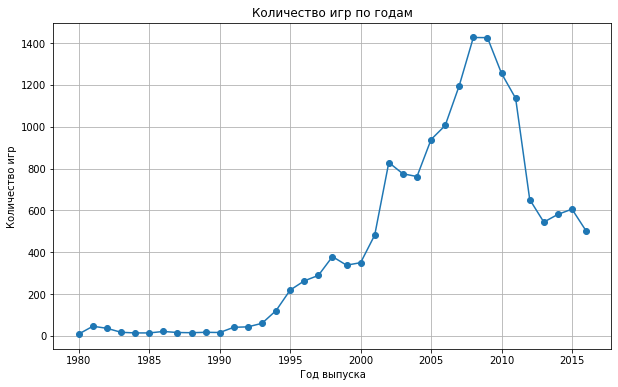

In [22]:
count_games = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

plt.figure(figsize = (10, 6))
plt.plot(count_games.index, count_games.values, marker='o', linestyle='-')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

**Промежуточный вывод:**<br> Можем предположить, что количество игр стало увеличиваться со временем, благодаря прогрессу компьютерных технологий. А в последние годы пошло на спад, ввиду появления телефонов и консолей, из-за чего многие люди начали больше играть на них, нежели чем на компьютерах.<br>Стоит сказать, что все не все продемострированные данные важны, ведь в период 1980-1995 игр , как и компаний, было очень мало. 

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. А также ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?**

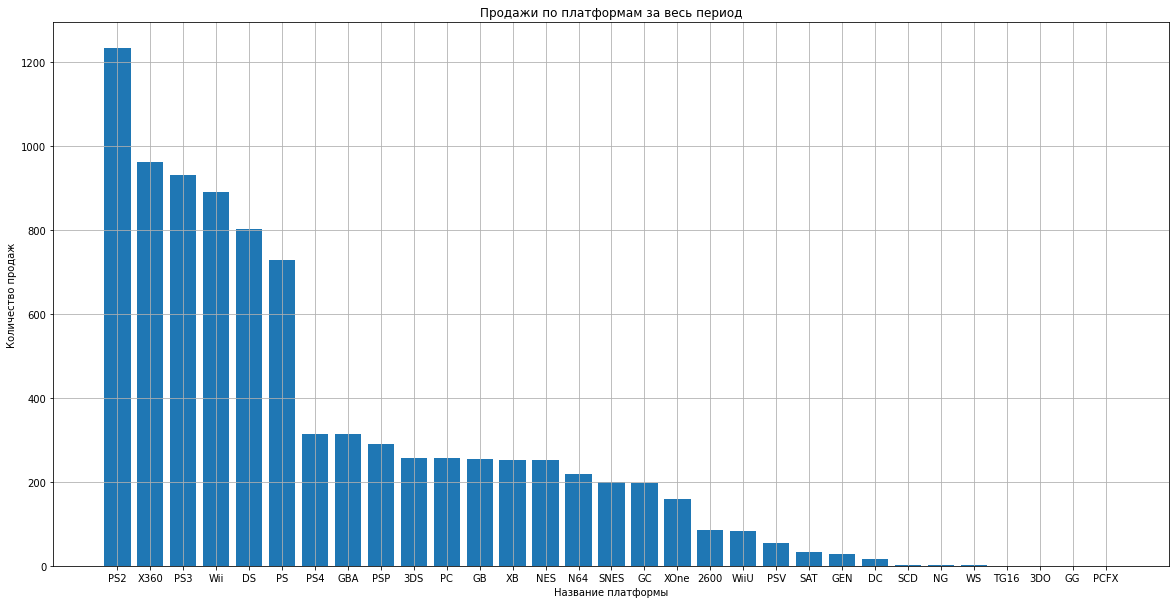

In [23]:
platform_sales = data.pivot_table(
    index = 'platform', values = 'total_sales', 
    aggfunc = 'sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize = (20, 10))
plt.bar(platform_sales.index, platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.grid(True)
plt.show()

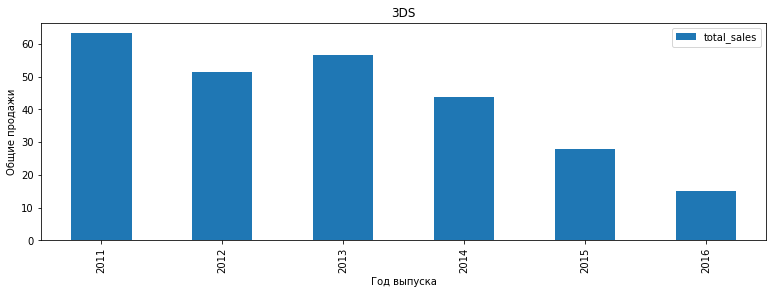

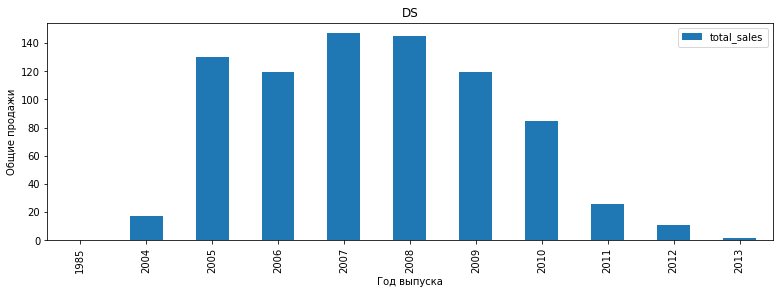

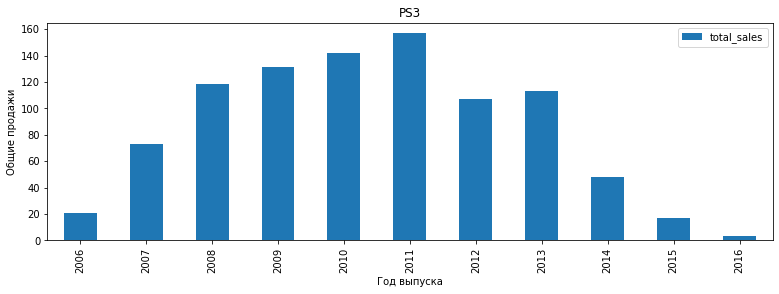

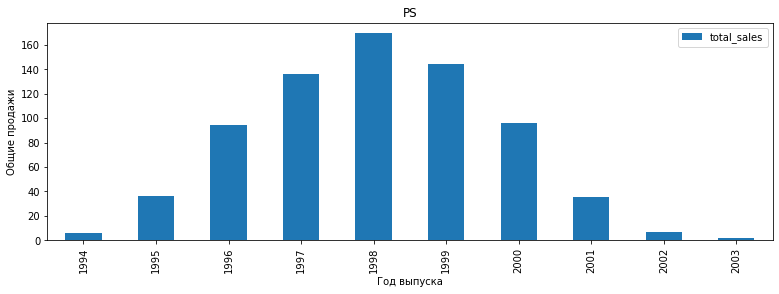

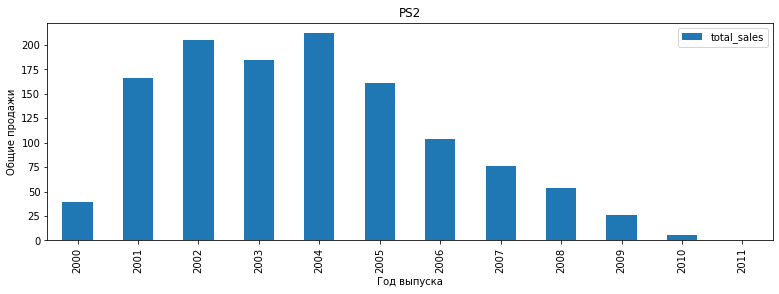

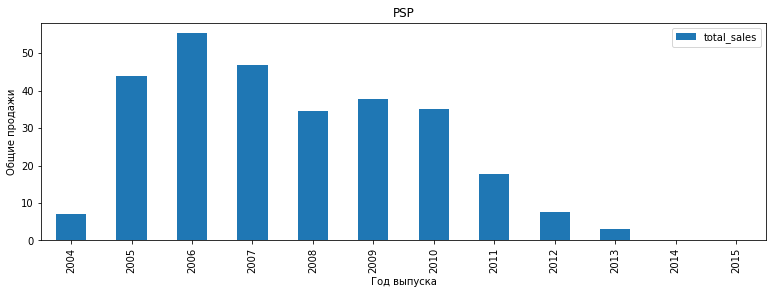

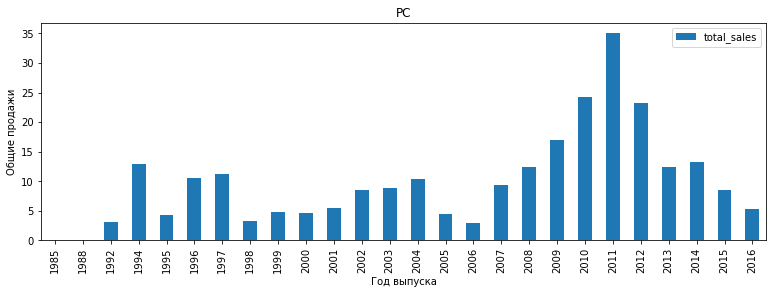

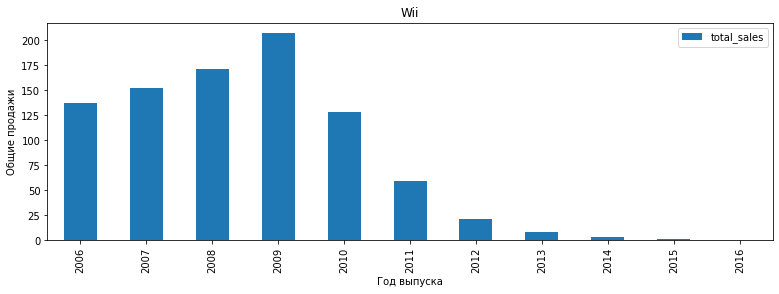

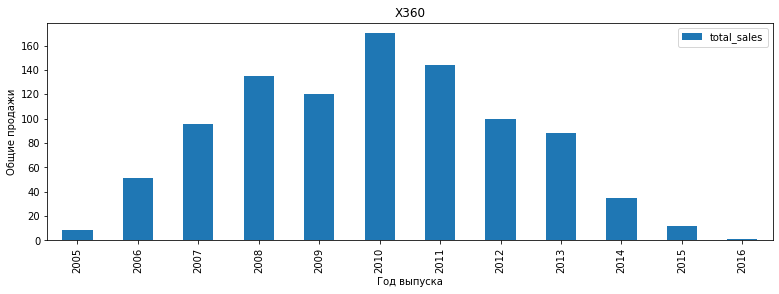

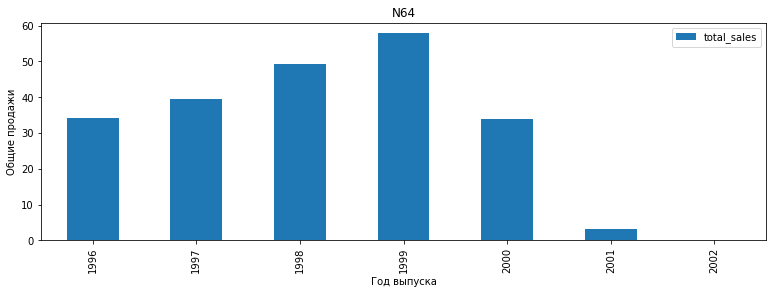

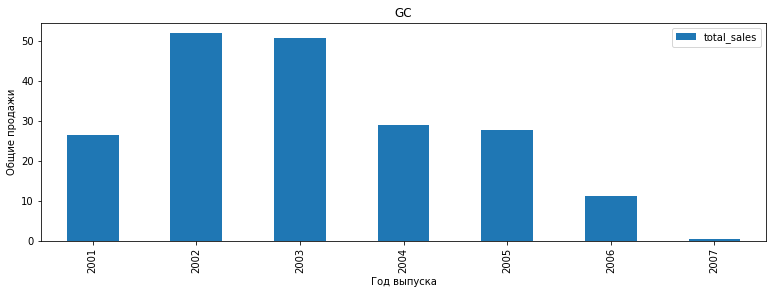

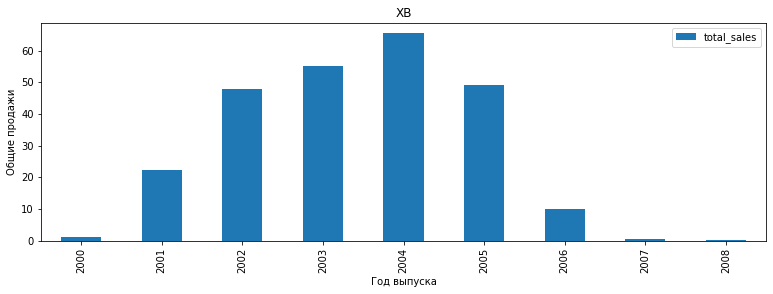

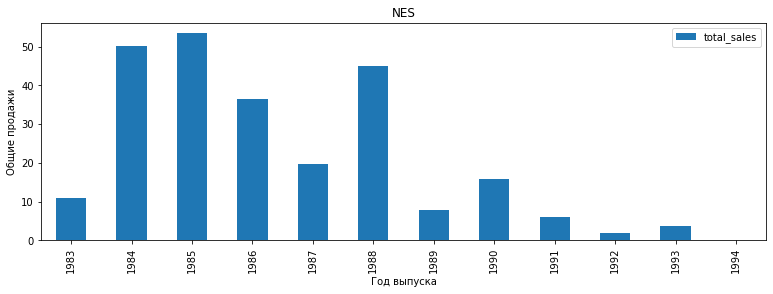

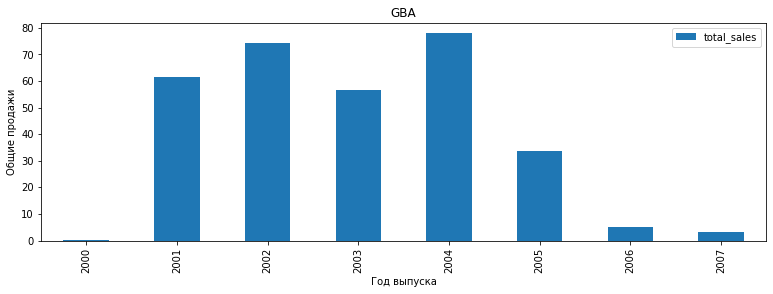

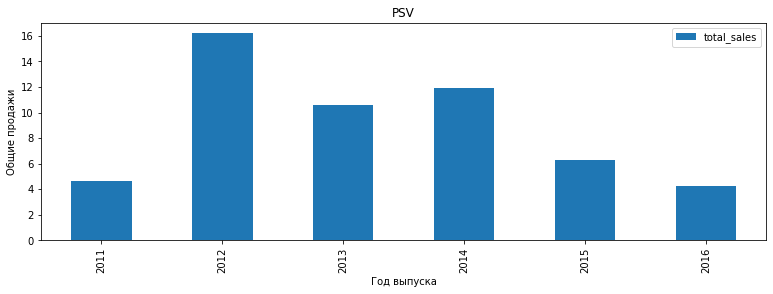

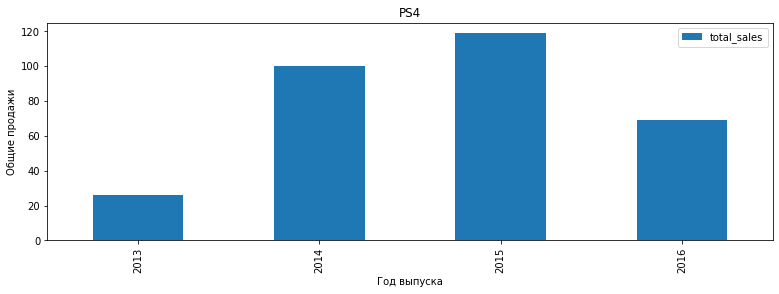

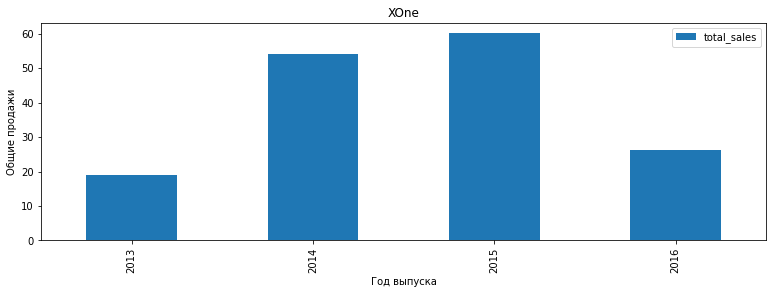

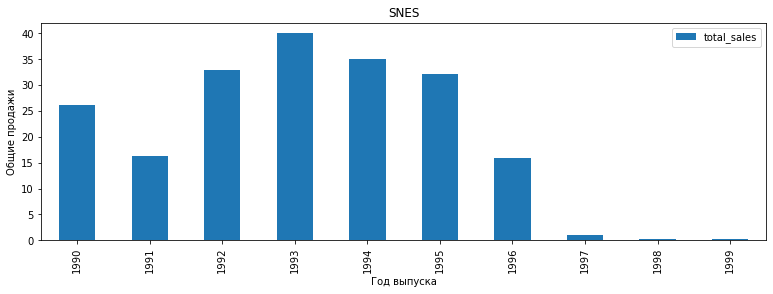

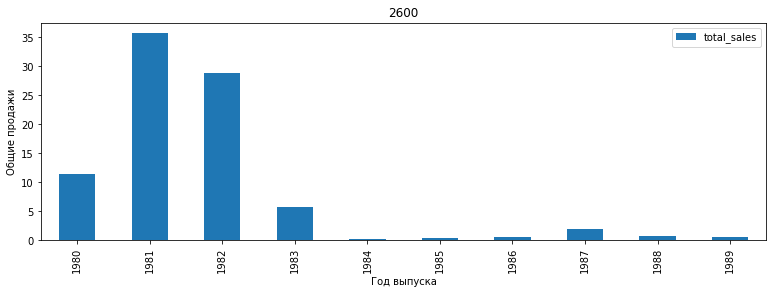

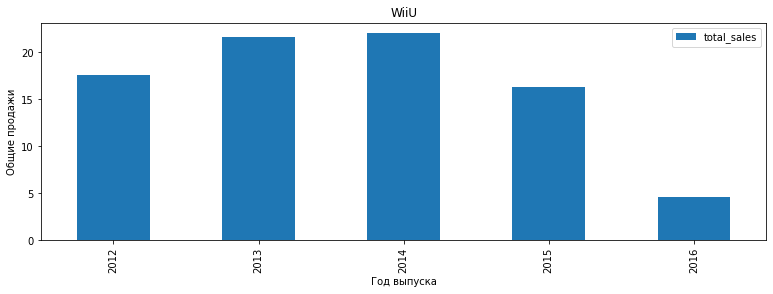

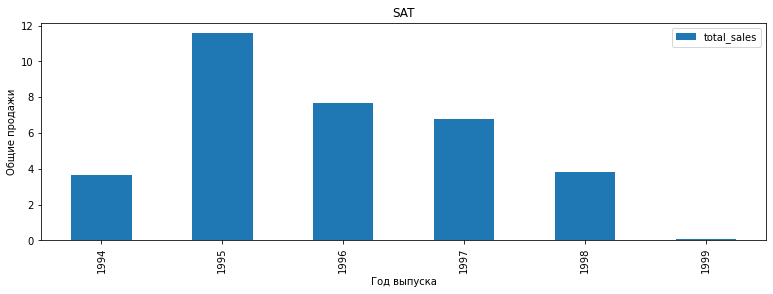

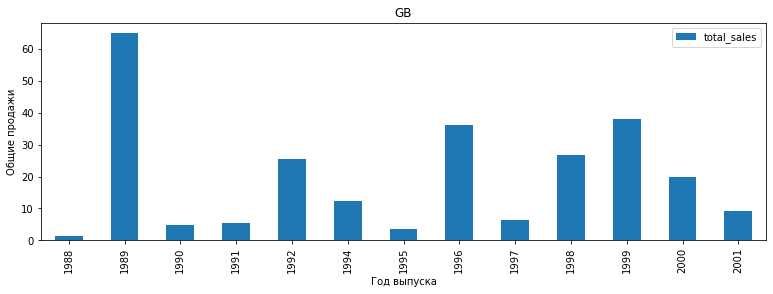

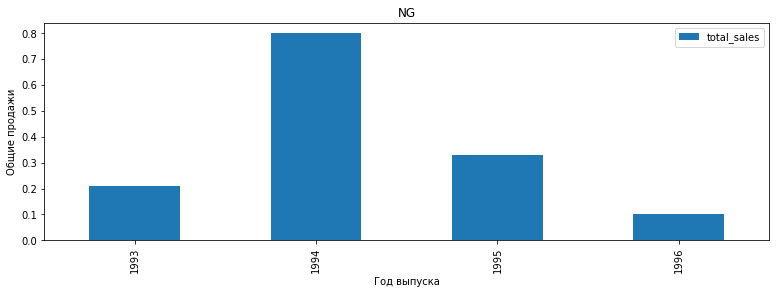

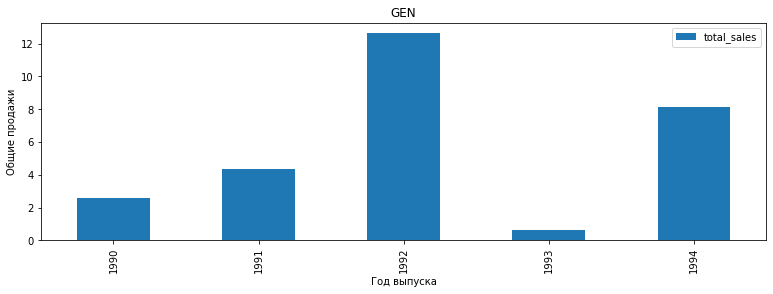

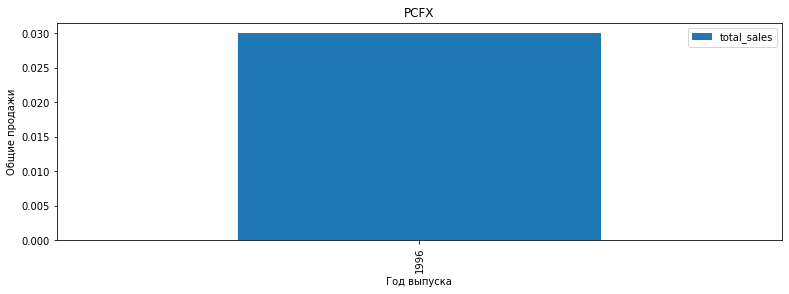

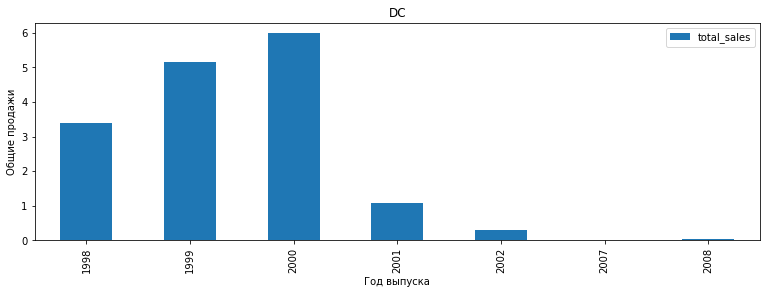

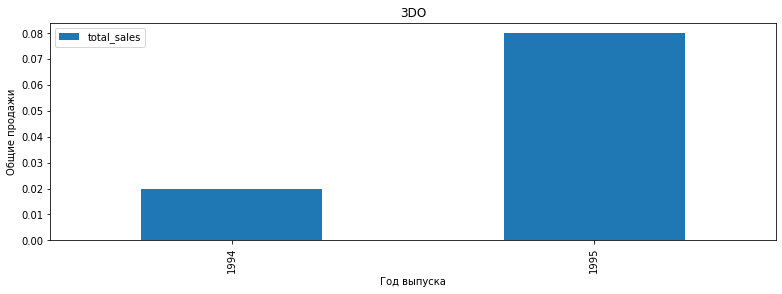

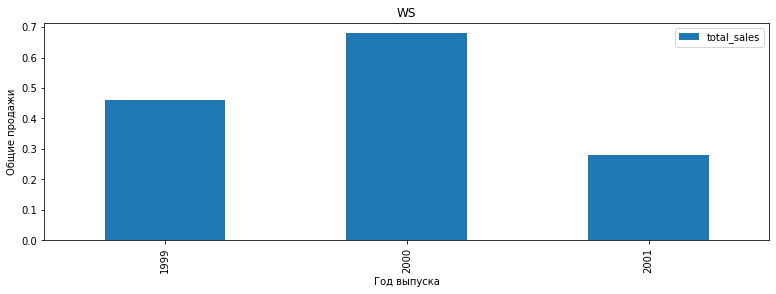

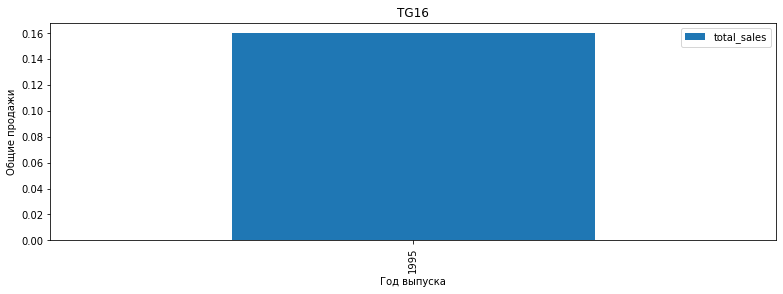

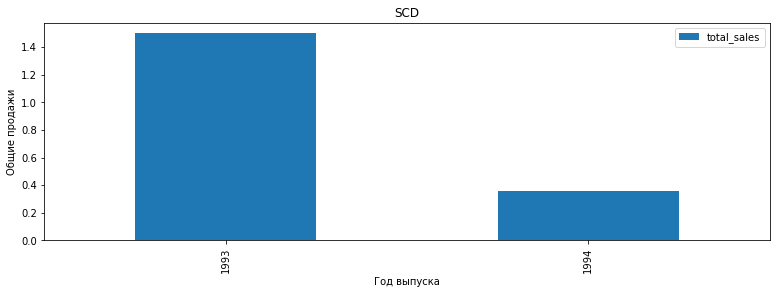

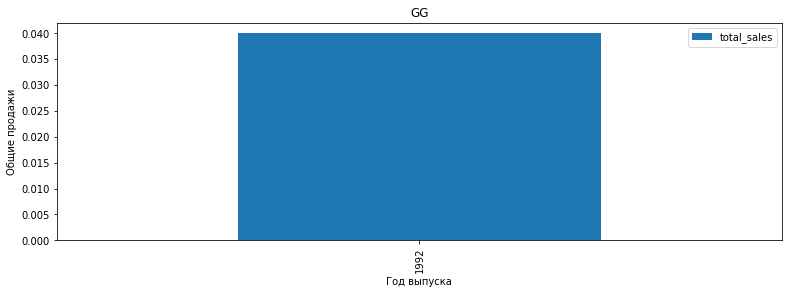

In [24]:
platform_list = data['platform'].unique()
for platform in platform_list:
    platform_data = data[data['platform'] == platform]
    pivot_table = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    
    ax = pivot_table.plot(kind='bar', figsize=(13, 4))
    
    ax.set_xlabel("Год выпуска")
    ax.set_ylabel("Общие продажи")
    
    plt.title(platform)
    plt.show()

**Промежуточный вывод:**<br> Мы построили график распределения по годам и по нему отчетливо видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.<br>Также стоит отметить, что из построенных далее графиков видим, что 'средняя продолжительность жизни' платформы в среднем равна 7 годам.

**Возьмем данные за соответствующий актуальный период. Самостоятельно определим актуальный период в результате исследования предыдущих вопросов(основной фактор — эти данные помогут построить прогноз на 2017 год). Не учитывайте в работе данные за предыдущие годы.**

**Промежуточный вывод:** Я считаю, что актуальным периодом для дальнейших исследований является 2013 - 2016 год, ведь, например, PS4 появилась на рынке в 2013 году, и ее продажи будут продолжаться и в 2017 году. Также игры создаются примерно 4 года, поэтому как раз в 2017 будут новые качественные игры, которые начали разрабатывать в 2013 году.

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

In [26]:
actual_data = data.query('year_of_release >= 2013')

best_sales_platform = actual_data.pivot_table(index=['platform','year_of_release'], 
                                              values='total_sales', aggfunc = 'sum')
print(best_sales_platform)

                          total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      201

In [27]:
all_actual_data = best_sales_platform.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
print(all_actual_data.sort_values('total_sales', ascending = False))

          total_sales
platform             
PS4            314.14
PS3            181.43
XOne           159.32
3DS            143.25
X360           136.80
WiiU            64.63
PC              39.43
PSV             32.99
Wii             13.66
PSP              3.50
DS               1.54


**Промежуточный вывод:** Стоит сказать, что топ 5 самых успешных платформ: PS4, PS3, XOne, 3DS, X360.<br> Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют свои предыдущие модели, а падают соответственно их предшественники: PS3, X360, DS, Wii и PSP.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

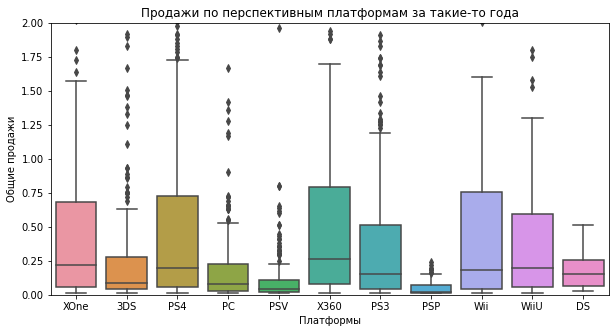

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=actual_data.sort_values('total_sales'), x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам за такие-то года')
plt.ylim(0, 2)
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

**Промежуточный вывод:** Из общего графика с усами можно сделать вывод.<br>Средняя выручка за игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.<br>Средняя выручка за игру по платформе PS3: 706 тыс. 3/4 игр заработали до 750 тыс. Рекорд 21 млн.<br>Средняя выручка за игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.<br>Средняя выручка за игру по платформе 3DS: 498 тыс. 3/4 игр заработали до 330 тыс. Рекорд 14,6 млн.<br>Средняя выручка за игру по платформе X360: 735 тыс. 3/4 игр заработали до 757 тыс. Рекорд 21,8 млн.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния, посчитаем корреляцию между отзывами и продажами и сформулируем выводы.**

За основу возьмем платформу PS4.

Напишем функцию, которая будет строить диаграммы и считать корреляции для других платформ.

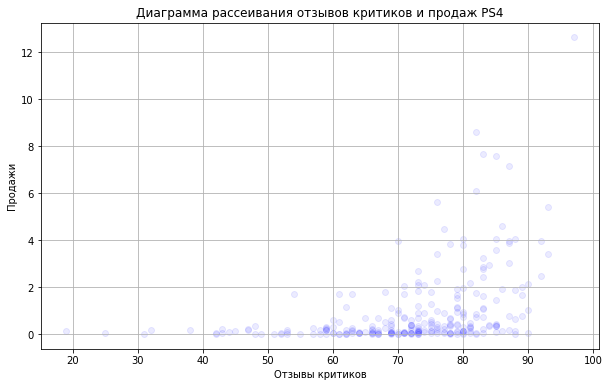

Корреляция между critic_score и total_sales: 0.40656790206178134


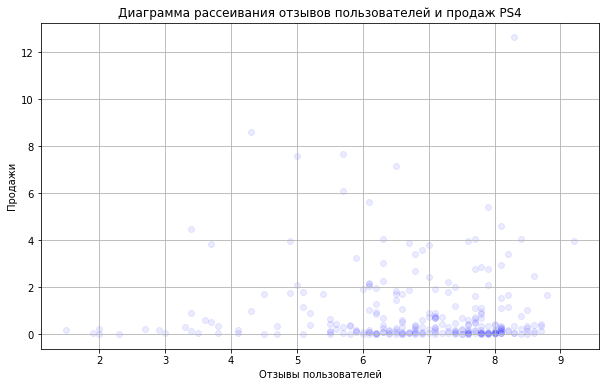

Корреляция между user_score и total_sales: -0.031957110204556355


In [29]:
PS4 = actual_data.query('platform == "PS4"')
def scatter_and_correlation(df, x_column, y_column, x_label, y_label, title):
    df = df[(df[x_column] != -1)] #Фильтр заглушек
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_column], df[y_column], color='blue', label=x_column, alpha=0.08)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

    correlation = df[x_column].corr(df[y_column])
    print(f'Корреляция между {x_column} и {y_column}: {correlation}')

scatter_and_correlation(PS4,  'critic_score', 'total_sales', 'Отзывы критиков', 'Продажи', 'Диаграмма рассеивания отзывов критиков и продаж PS4')
scatter_and_correlation(PS4, 'user_score', 'total_sales', 'Отзывы пользователей', 'Продажи', 'Диаграмма рассеивания отзывов пользователей и продаж PS4')

**Промежуточный вывод:** Согласно проделанной работе на данном шаге можно убедиться, что зависимости между оценкой критиков и продажами умеренная, а зависимость между оценкой пользователей и продажами почти отсутствует.

**Соотнесем выводы с продажами игр на других платформах.**

In [30]:
PS3 = actual_data.query('platform == "PS3"')
XOne = actual_data.query('platform == "XOne"')
_3DS = actual_data.query('platform == "3DS"')
X360 = actual_data.query('platform == "X360"')

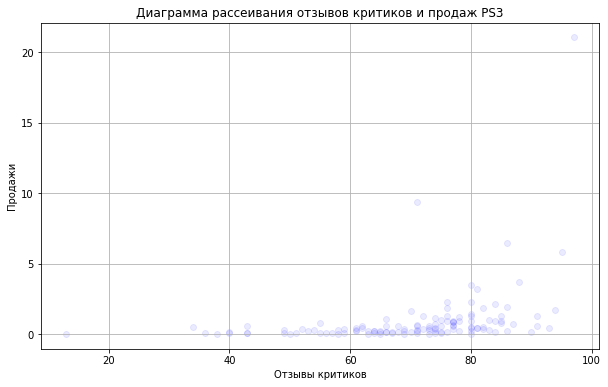

Корреляция между critic_score и total_sales: 0.33428533933719196


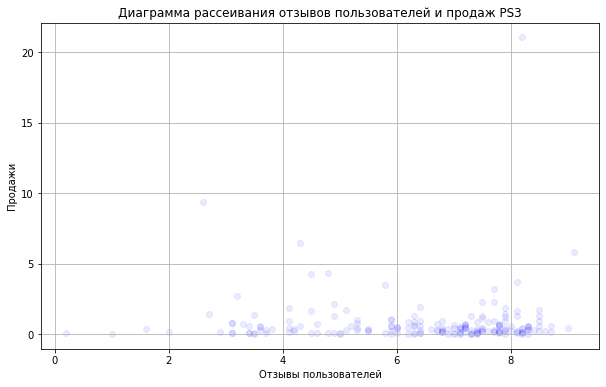

Корреляция между user_score и total_sales: 0.002394402735756626


In [31]:
scatter_and_correlation(PS3, 'critic_score', 'total_sales', 'Отзывы критиков', 'Продажи', 'Диаграмма рассеивания отзывов критиков и продаж PS3')
scatter_and_correlation(PS3, 'user_score', 'total_sales', 'Отзывы пользователей', 'Продажи', 'Диаграмма рассеивания отзывов пользователей и продаж PS3')

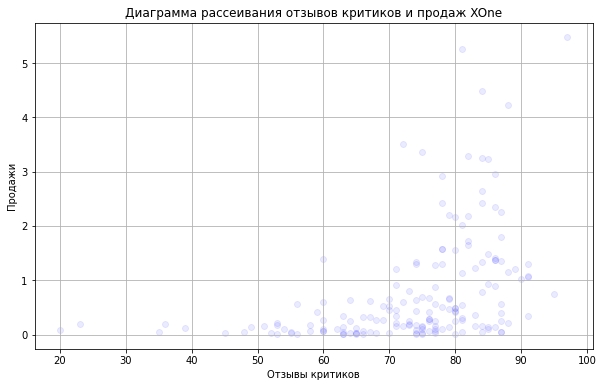

Корреляция между critic_score и total_sales: 0.416998328008402


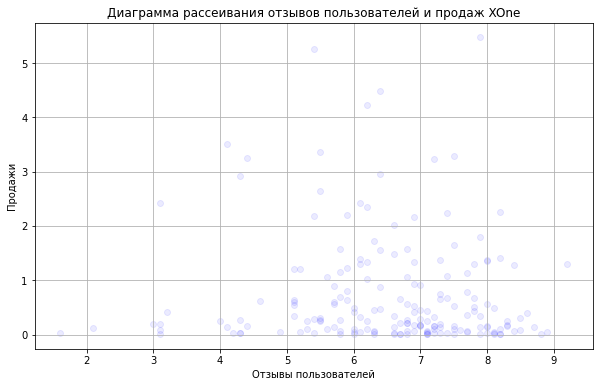

Корреляция между user_score и total_sales: -0.06892505328279423


In [32]:
scatter_and_correlation(XOne, 'critic_score', 'total_sales', 'Отзывы критиков', 'Продажи', 'Диаграмма рассеивания отзывов критиков и продаж XOne')
scatter_and_correlation(XOne, 'user_score', 'total_sales', 'Отзывы пользователей', 'Продажи', 'Диаграмма рассеивания отзывов пользователей и продаж XOne')

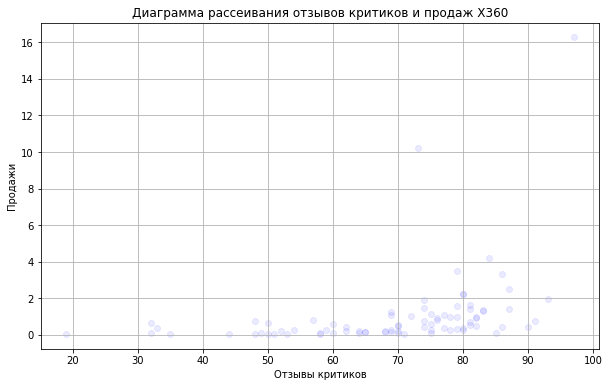

Корреляция между critic_score и total_sales: 0.3503445460228664


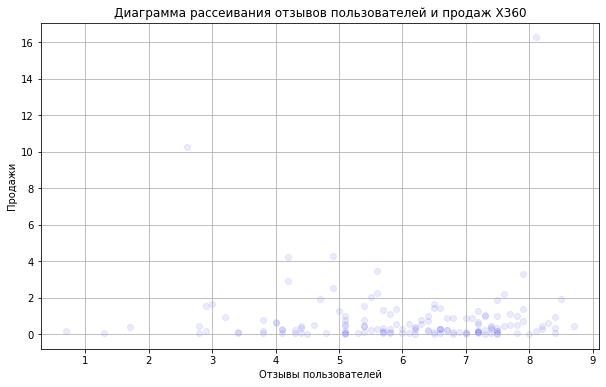

Корреляция между user_score и total_sales: -0.011742185147181373


In [33]:
scatter_and_correlation(X360, 'critic_score', 'total_sales', 'Отзывы критиков', 'Продажи', 'Диаграмма рассеивания отзывов критиков и продаж X360')
scatter_and_correlation(X360, 'user_score', 'total_sales', 'Отзывы пользователей', 'Продажи', 'Диаграмма рассеивания отзывов пользователей и продаж X360')

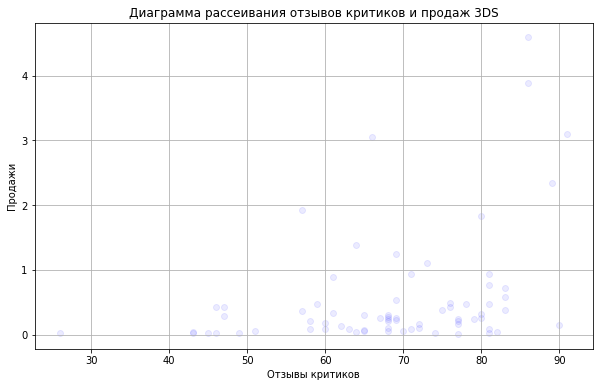

Корреляция между critic_score и total_sales: 0.3570566142288105


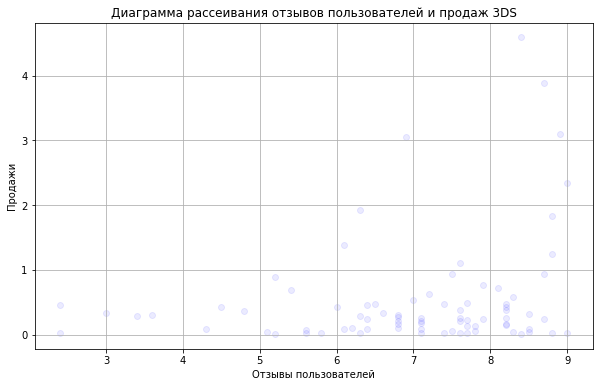

Корреляция между user_score и total_sales: 0.2415041177356301


In [34]:
scatter_and_correlation(_3DS, 'critic_score', 'total_sales', 'Отзывы критиков', 'Продажи', 'Диаграмма рассеивания отзывов критиков и продаж 3DS')
scatter_and_correlation(_3DS, 'user_score', 'total_sales', 'Отзывы пользователей', 'Продажи', 'Диаграмма рассеивания отзывов пользователей и продаж 3DS')

**Промежуточный вывод:**<br>PS3: зависимость между оценкой критиков и количеством продаж умеренная, зависимость между оценкой пользователей и количеством продаж почти отсутствует;<br>XOne: зависимость между оценкой критиков и количеством продаж умеренная, зависимость между оценкой пользователей и количеством продаж почти отсутствует;<br>X360: зависимость между оценкой критиков и количеством продаж умеренная, зависимость между оценкой пользователей и количеством продаж почти отсутствует;<br>3DS: зависимость между оценкой критиков и количеством продаж умеренная, зависимость между оценкой пользователей и количеством продаж слабая.<br>То есть, можно сказать, что оценки критиков, в большинстве, не сильно влияют на продажи. А вот оценки пользователей, также в большинстве, вообще не оказывают влияния.

**Посмотрим на общее распределение игр по жанрам.**

In [35]:
actual_data['genre'].unique()

array(['Role-Playing', 'Platform', 'Adventure', 'Misc', 'Sports',
       'Action', 'Simulation', 'Strategy', 'Shooter', 'Fighting',
       'Racing', 'Puzzle'], dtype=object)

In [36]:
data_genre = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
print(data_genre.sort_values('total_sales', ascending = False))

              total_sales
genre                    
Action             321.87
Shooter            232.98
Sports             150.65
Role-Playing       145.89
Misc                62.82
Platform            42.63
Racing              39.89
Fighting            35.31
Adventure           23.64
Simulation          21.76
Strategy            10.08
Puzzle               3.17


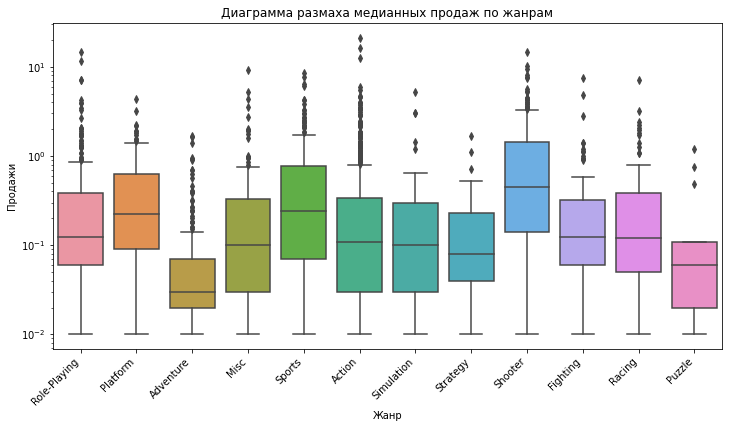

,total_sales,median_sales
genre,,
Shooter,232.98,0.450
Sports,150.65,0.240
Platform,42.63,0.225
Role-Playing,145.89,0.125
Fighting,35.31,0.125
Racing,39.89,0.120
Action,321.87,0.110
Simulation,21.76,0.100
Misc,62.82,0.100


In [37]:
#медианные продажи
data_genre['median_sales'] = actual_data.groupby('genre')['total_sales'].median()
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='genre', y='total_sales', data=actual_data)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')
plt.title('Диаграмма размаха медианных продаж по жанрам')
plt.show()

data_genre.sort_values('median_sales', ascending = False)

**Промежуточный вывод:**<br>После построения ящиков с усами абсолютно точно можно сказать, что самый успешный жанр - 'Shooter', однако достаточно успешны 'Sports' и 'Platform'. Возможно, это обусловлено тем, что историей создания игр и желания людей проверить свои навыки ловкости и реакции.<br>Самые низкие по продажам жанры - 'Puzzle' и 'Adventure'.

# Портрет пользователя каждого региона.

**Определим самые популярные платформы для каждого региона.**

Для начала напишем функцию, которая будет определять топ-5 чего-либо в регионах и показывать их процентное соотношение.

In [38]:
def top_reg(index, region_name):
    _pivot_table = actual_data.pivot_table(index = index, values = region_name, aggfunc = 'sum')
    sorted_platforms = _pivot_table.sort_values(by=region_name, ascending=False).head()
    display(sorted_platforms)
    
    total_sales = sorted_platforms[region_name].sum()
    sorted_platforms['sales_share'] = round((sorted_platforms[region_name] / total_sales) * 100, 2)
    display(sorted_platforms[['sales_share']])

**Пользователи Северной Америки.**

In [39]:
top_reg('platform', 'na_sales')

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,sales_share
platform,
PS4,28.23
XOne,24.17
X360,21.20
PS3,16.48
3DS,9.92


In [40]:
top_reg('genre', 'na_sales')

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,sales_share
genre,
Action,33.62
Shooter,29.27
Sports,17.41
Role-Playing,12.37
Misc,7.33


**Пользователи Европы.**

In [41]:
top_reg('platform', 'eu_sales')

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,sales_share
platform,
PS4,42.25
PS3,20.30
XOne,15.45
X360,12.73
3DS,9.27


In [42]:
top_reg('genre', 'eu_sales')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,sales_share
genre,
Action,36.50
Shooter,27.14
Sports,18.70
Role-Playing,11.42
Racing,6.24


**Пользователи Японии.**

In [43]:
top_reg('platform', 'jp_sales')

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


,sales_share
platform,
3DS,49.64
PS3,17.09
PSV,13.61
PS4,11.68
WiiU,7.97


In [44]:
top_reg('genre', 'jp_sales')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


,sales_share
genre,
Role-Playing,44.39
Action,35.21
Misc,8.00
Fighting,6.65
Shooter,5.75


**Промежуточный вывод:**<br>Топ-5 платформ Северной Америки: PS4, XOne, X360, PS3 и 3DS. Из них лидируют платформы PS4 и XOne.<br>Топ-5 платформ Европы: PS4, PS3, XOne, X360 и 3DS. Из них лидирует платформа PS4.<br>Топ-5 платформ Японии: 3DS, PS3, PSV, PS4 и WiiU. Из них лидер - 3DS.<br><br>Топ-5 жанров Северной Америки: Action, Shooter, Sports, Role-Playing, Misc. Из них лидеры - Action и Shooter.<br>Топ-5 жанров Европы: Action, Shooter, Sports, Role-Playing и Racing. Из них лидеры - Action и Shooter.<br>Топ-5 жанров Японии: Role-Playing, Action, Misc, Fighting, Shooter.<br><br> Отсюда видно, что списки топ-5 платформ и жанров во многом схожи между Северной Америкой и Европой. Япония сильно отличается от них.<br>Различия в популярности игровых платформ в значительной мере обусловлены воздействием ключевых игроков на рынке. В результате этого во всех рейтингах присутствует продукция компании Sony.<br>Также немалую роль играет местоположение компании. Например, популярность платформ XOne и X360 в Северной Америке связана с влиянием крупного участника рынка в этом регионе - компании Microsoft. Аналогичная ситуация просматривается в Японии, где компания Nintendo, представившая две платформы 3DS и WiiU, играет важную роль. Европейский рынок, не имея крупных игроков в разработке платформ, ориентируется на общую популярность платформы.<br><br>Игры в категории Misс относятся к разряду игр, объединяющих в себе элементы ловкости и действий. Они не подпадают под категории боевых игр, лабиринтов, спортивных соревнований, игр на удержание мяча или гонок. Эти новые игры предоставляют игрокам возможность проверить свою ловкость и реакцию через различные подходы.<br>
Характерные тенденции среди американских и европейских игроков по жанрам в целом схожи. Однако японские игроки выделяются своим предпочтением к играм с глубоким смыслом. Независимо от региона, игры в жанре экшен всегда будут популярны, поскольку многие поколения выросли, играя в этот жанр, а также шутеры, предлагающие имитацию боевых действий.<br>

**Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [45]:
top_reg('rating', 'na_sales')

,na_sales
rating,
M,165.21
-1,89.42
E,79.05
E10+,54.24
T,49.79


,sales_share
rating,
M,37.74
-1,20.43
E,18.06
E10+,12.39
T,11.38


In [46]:
top_reg('rating', 'eu_sales')

,eu_sales
rating,
M,145.32
E,83.36
-1,78.91
E10+,42.69
T,41.95


,sales_share
rating,
M,37.05
E,21.25
-1,20.12
E10+,10.88
T,10.70


In [47]:
top_reg('rating', 'jp_sales')

,jp_sales
rating,
-1,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


,sales_share
rating,
-1,60.41
T,14.63
E,10.75
M,10.02
E10+,4.18


**Промежуточный вывод:**<br>В Северной Америке почти в равных долях лидируют возраста категорий E(для всех возрастов) и М(17+).<br>В Европе также почти в равных долях лидируют возраста категорий E и М.<br>А вот в Японии лидирует возраст категории E.<br><br>В Америке и Европе схожие ситуации - с небольшим отрывом между собой лидируют категории Е и М. Значит, рынок хочет угодить и всем возрастам, и взрослым людям.<br>
В Японии лидириуют игры с возрастным рейтингом E, причем с большим отрывом, по сравнению с другими. Компании хотят распространить свое влияние взрослых людей.<br> Делаю вывод, что рейтинг возраста влияет по каждому региону.

**Вывод по шагу:**<br>Портрет пользователя Северной Америки. Платформа PS4/, жанр Action, возрастная группа: Е.<br>Портрет пользователя Европы. Платформа PS4, жанр Action, возрастная группа: Е.<br>Портрет пользователя Японии. Платформа 3DS, жанр Role-Playing, возрастная группа: Е.

# Проверим гипотезы.

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC равны.<br>**H1:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [48]:
alpha = 0.05

user_score_XOne = actual_data.query('platform == "XOne"')['user_score'].dropna()
user_score_PC = actual_data.query('platform == "PC"')['user_score'].dropna()

res = stats.ttest_ind(user_score_XOne, user_score_PC)
print(res.pvalue)
if (res.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


In [49]:
# Комментарий ревьюера
res.pvalue

0.14012658403611503

**Промежуточный вывод:** Принимаем нулевую гипотезу, а значит средние пользовательские рейтинги платформ Xbox One и PC равны.

**Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.**

**H0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>**H1:** Средние пользовательские рейтинги жанров Action и Sports разные.

In [50]:
alpha = 0.05

user_score_Action = actual_data.query('genre == "Action"')['user_score'].dropna()
user_score_Sports = actual_data.query('genre == "Sports"')['user_score'].dropna()

res = stats.ttest_ind(user_score_Action, user_score_Sports)
print(res.pvalue)
if (res.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Промежуточный вывод:** Отвергаем нулевую гипотезу, а значит cредние пользовательские рейтинги жанров Action и Sports разные.

**Ответ на вопрос:**<br>Мы использовали t-тест для независимых выборок. Критерий alpha = 0.05 был выбран, так как соответствует стандартной практике использования уровня значимости. Если p-значение (рассчитанное с помощью t-теста) оказывается меньше alpha, то нулевая гипотеза отвергается в пользу альтернативной. В противном случае нулевая гипотеза не отвергается.

# Вывод.

После подобного масштабного проекта стоит сделать не менее масштабный вывод.<br>Мы провели анализ данных интернет-магазина 'Стримчик' за 2016 год.<br>Мы привели названия всех столбцов к нижнему регистру (для дальнейшего удобства). Была проделана работа с пропущенными значениями, дубликатами, типами переменных. Также был создан новый столбец с общим числом продаж во всех регионах.<br>Далее с помощью графиков мы выяснили, что актуальным периодом для дальнейших исследований является 2013 - 2016 год.<br>Ну а после с помошью корреляций и ящиков с усами сделали выводы:<br>Средняя выручка за игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.<br>Средняя выручка за игру по платформе PS3: 706 тыс. 3/4 игр заработали до 750 тыс. Рекорд 21 млн.<br>Средняя выручка за игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.<br>Средняя выручка за игру по платформе 3DS: 498 тыс. 3/4 игр заработали до 330 тыс. Рекорд 14,6 млн.<br>Средняя выручка за игру по платформе X360: 735 тыс. 3/4 игр заработали до 757 тыс. Рекорд 21,8 млн.<br>С помощью графиков рассеивания утвердили, зависимость между оценкой критиков умеренная, а  между оценкой пользователей и продажами - практически отсутствует или слабая, а это значит, что, в большинстве, зависимость есть и со стороны критиков, и со стороны пользователей.<br>Из всех жанров самый успешным по продажам оказался Shooter, на втором месте Sports.<br>Далее мы, исследуя топ-5 платформ, жанров и возрастных групп составили портреты пользователя каждого региона. Портрет пользователя Северной Америки. Платформа PS4/, жанр Action, возрастная группа: Е.<br>Портрет пользователя Европы. Платформа PS4, жанр Action, возрастная группа: Е.<br>
Портрет пользователя Японии. Платформа 3DS, жанр Role-Playing, возрастная группа: Е.<br>И на последнем шаге проверили гипотезы с помощью t-тестов для двух независимых выборок, которые подтвердили, что средние пользовательские рейтинги платформ Xbox One и PC равны, а cредние пользовательские рейтинги жанров Action и Sports разные.<br><br>Прогноз на 2017 год:<br>1)В самом разгаре будут лишь современные платформы, в том числе и игры для них (PS4, XOne и 3DS).<br>2)Выставлять на прилавки популярные жанры - Shooter, Sports, Pla и Role-Playing.<br>3)Насчет возвратсной группы все отлично, так и нужно держать, чтобы в игры могли играть пользователи любых возрастов, то есть распро